# Applied Data Science and Machine Intelligence
## A program by IITM and TalentSprint
### Assignment 1: Introduction to Deep Learning

## Learning Objectives

At the end of the experiment, you will be able to

* understand the concept of deep learning and its differences with classical machine learning.
* implement a simple multi-layer perceptron from scratch.
* implement the back-propagation algorithm from scratch.
* understand different types of activation functions.

### What is Deep Learning?

Deep Learning is a subfield of machine learning that deals with algorithms inspired by the structure and function of a human brain. Broadly we term such algorithms as Artificial Neural Networks. The adjective "deep" in deep learning refers to the use of multiple layers in the network. Early work showed that a linear perceptron cannot be a universal classifier, but that a network with a non-polynomial activation function with one hidden layer of unbounded width can. Deep learning is a modern variation which is concerned with an unbounded number of layers of bounded size, which permits practical application and optimized implementation, while retaining theoretical universality under mild conditions. Artificial Neural Networks use multiple layers to progressively extract higher-level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces. The relation between deep learning and classical machine learning is summed in the image below.

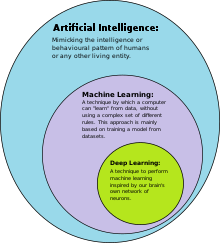

### Machine Learning vs Deep Learning? 
Classical machine learning approaches use hand crafted features to represent data. They often require complex feature engineering. Usually, a deep dive exploratory data analysis is first performed on the dataset. A dimensionality reduction might then be done for easier processing. Finally, the best features must be carefully selected to pass over to the ML algorithm. They work decently well for small datasets. However, the power of deep learning is that, it learns directly from the data with minimal handcrafting requirements. 

Deep networks have achieved accuracies that are far beyond that of classical ML methods in many domains including speech, natural language, vision, and playing games. For example, the graph below shows the image classification accuracy of different methods on the ImageNet dataset; blue colour indicates classical ML methods and red colour indicates a deep Convolutional Neural Network (CNN) method. Deep learning blows classical ML out of the water here.



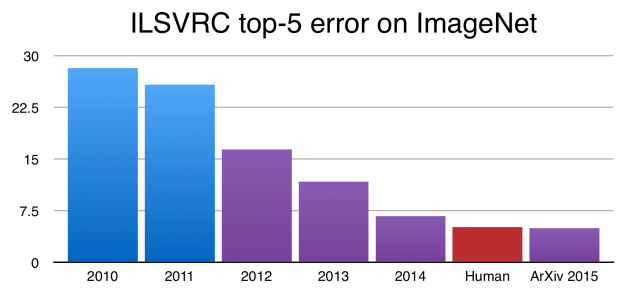

Deep networks scale much better with more data than classical ML algorithms. The graph below is a simple yet effective illustration of this. Often times, the best advice to improve accuracy with a deep network is just to use more data! With classical ML algorithms this quick and easy fix doesn’t work even nearly as well and more complex methods are often required to improve accuracy.



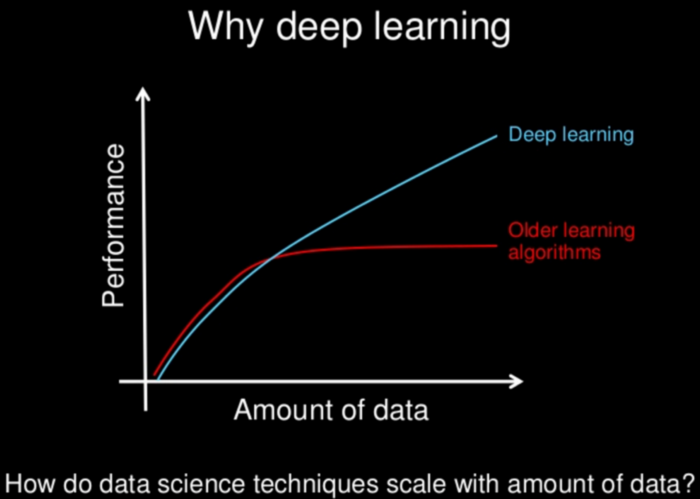

Let us look at how deep learning networks are designed using artificial neural networks.

#### Biological Neurons

Biological neurons send and receive signals from the brain. The main component functions of a neuron are - Dendrite: Receives signals from other neurons; Soma: Processes the information; Axon: Transmits the output of this neuron; Synapse: Point of connection to other neurons.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png" width= 500 px/>
</center>

Individual biological neurons are organized in a vast network of billions, with each neuron typically connected to thousands of other neurons. Highly complex computations can be performed by a network of fairly simple neurons.


#### Artificial Neurons

Modeled after human brain activity, artificial neurons are digital constructs that simulate the behavior of biological neurons in some ways. The first computational model of an (artificial) neuron was proposed by Warren McCulloch (neuroscientist) and Walter Pitts (logician) in 1943. 

As shown below, it may be divided into 2 parts. The first part, g takes an input, performs aggregation, and based on the aggregated value, the second part, f, makes a decision. Understand further through an example 'Watch a football game' in this [article](https://towardsdatascience.com/mcculloch-pitts-model-5fdf65ac5dd1).

<br><br>
<center>
<img src="https://miro.medium.com/max/369/1*fDHlg9iNo0LLK4czQqqO9A.png" width= 320px/>
</center>

<br><br>


### The Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (shown in the figure below) called a **threshold logic unit (TLU)**. The inputs and the output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $$(z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^⊺ w)$$, then applies a step function to that sum and outputs the result: $$h_w(x) = step(z)$$, where $z = x^⊺ w$.
<br><br>
<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1004.png" width= 400px/>
</center>

$\hspace{10cm} \text {Threshold logic unit}$
<br><br>
The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$heaviside (z) = \begin{equation}
\left\{ 
  \begin{aligned}
    &0&  if\ \  z < 0\\ 
    &1&  if\ \  z \ge 0\\ 
  \end{aligned}
  \right.
\end{equation}
$$

$$sgn (z) = \begin{equation}
\left\{ 
  \begin{aligned}
    &-1&  if\ \  z < 0\\ 
    &0&  if\ \  z = 0\\
    &1&  if\ \  z > 0\\ 
  \end{aligned}
  \right.
\end{equation}
$$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class. 



The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the Perceptron convergence theorem.

### Import required packages

In [30]:
# Importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from glob import glob
import cv2
import random

# Importing Tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# Importing different sklearn stuff
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from sklearn.metrics import accuracy_score

# Import the mnist dataset
from keras.datasets import mnist

# Train-test split
from sklearn.model_selection import train_test_split

Scikit-Learn provides a `Perceptron` class that implements a single-TLU network. 

Let's see how it can be used on the MNIST dataset.

### MNIST Dataset

MNIST dataset consists of over $60,000$ train images and $10,000$ test images from 10 digit classes ($0 - 9$) and is available in several libraries. We load the data below and will use it for training multiple linear classifiers. 

11501568/11490434 [==============================] - 0s 0us/step
-----------Stats-----------
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
-----------Plots-----------
Label of the below image:  2


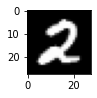

Label of the below image:  8


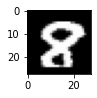

In [3]:
# Loading the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print ("-----------Stats-----------")


# Printing the shapes of the data for checking the numbers in train and test split.
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

print ("-----------Plots-----------")

# Plotting two images randomly and also printing their labels
for i in range(2):
  j = np.random.randint(0, 60000)  
  plt.subplot(330 + 1 + i)
  plt.imshow(train_X[j], cmap=plt.get_cmap('gray'))
  print ("Label of the below image: ", train_y[j])
  plt.show()



In [4]:
# Creating a perceptron model
perceptron_model = Perceptron(tol=1e-3, random_state=0)

# The model takes in (Input, Labels) as input in the fit function.
# The model requires 2D data as input. It requires data which is shaped as (N, D). In our case, N=60,000 and D = 28*28 = 784
# The labels will be shaped as (N,), this is what we have so no change done to the labels (stored in train_y)
train_X_reshaped = np.reshape(train_X, (train_X.shape[0], train_X.shape[1]*train_X.shape[2]))

# Train the perceptron model.
perceptron_model.fit(train_X_reshaped, train_y)

# Prepare test data for the perceptron model.
# We reshape the data in the same way we do during training. 
test_X_reshaped = np.reshape(test_X, (test_X.shape[0], test_X.shape[1]*test_X.shape[2]))

# Calculate the accuracy of the model that just got trained.
acc = perceptron_model.score(test_X_reshaped, test_y)

# Print the accuracy that is given in terms of a probability ranging from 0 to 1.
print ("The accuracy of the trained perceptron model is: {}%".format(acc*100))

The accuracy of the trained perceptron model is: 88.97%


In [5]:
# Saving the perceptron model in the disk.
# Please go to the number four option in your left hand bar with a folder icon. Click on it to access the local space in the collab.
# Your model will be saved there
filename = 'perceptron_model.sav'
pickle.dump(perceptron_model, open(filename, 'wb'))

# Loading the same model to show the acc remains the save.
loaded_perceptron = pickle.load(open(filename, 'rb'))
# Calculate the accuracy of the model that just got trained.
acc_loaded = loaded_perceptron.score(test_X_reshaped, test_y)

# Print the accuracy that is given in terms of a probability ranging from 0 to 1.
print ("The accuracy of the loaded model is: {}%".format(acc_loaded*100))

The accuracy of the loaded model is: 88.97%


Let us also individually plot and check a few predictions achieved by the perceptron algorithm. You can keep running the next code snippet and the randomly test images will be selected.

Ground-truth label of the below image:  3


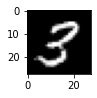

Predicted label of the above image:  3
------------------------------------------------
Ground-truth label of the below image:  1


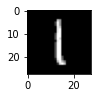

Predicted label of the above image:  1
------------------------------------------------


In [6]:
# Plotting two images randomly and also printing their labels
for i in range(2):
  j = np.random.randint(0, 10000)  
  plt.subplot(330 + 1 + i)
  plt.imshow(test_X[j], cmap=plt.get_cmap('gray'))
  print ("Ground-truth label of the below image: ", test_y[j])
  plt.show()

  # Predicting function from the perceptron model.
  label_predict = loaded_perceptron.predict([test_X[j].flatten()])

  # label_predict has the label.
  print ("Predicted label of the above image: ", label_predict[0])
  print ("------------------------------------------------")


### Is this the best available solution?

Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

One of the weaknesses of Perceptrons is that they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem; shown on the left side of the figure given below.

But this limitation can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a **Multilayer Perceptron (MLP)**. 

An MLP can solve the XOR problem, as we can verify by computing the output of the MLP represented on the right side of the figure given below: 

* with inputs (0, 0) or (1, 1), the network outputs 0, and 
* with inputs (0, 1) or (1, 0) it outputs 1. 

All connections have a weight equal to 1, except the four connections where the weight is shown.

<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1006.png" width= 500px/>
</center>

$\hspace{8cm} \text {XOR problem}\hspace{5 cm} \text {MLP}$
<br><br>

### The Multilayer Perceptron and Backpropagation

An MLP is composed of 

* one (passthrough) **input layer**, 
* one or more layers of TLUs called **hidden layers**, and 
* one final layer of TLUs called the **output layer** as shown in the figure below. 

The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a **bias neuron** and is fully connected to the next layer.

<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1007.png" width= 500px/>
</center>

When an ANN contains a deep stack of hidden layers, it is called a **deep neural network (DNN)**. The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations.

MLPs are trained using **backpropagation training algorithm**.

In short, it is Gradient Descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regard to every single model parameter. 

In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

Let’s run through this algorithm in detail:

* It handles one mini-batch at a time (say, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an **epoch**.

* Each mini-batch is passed to the network’s **input layer**, which sends it to the first **hidden layer**. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the **output layer**. This is the **forward pass**: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.

* Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

* Then it computes how much each output connection contributed to the error.
This is done analytically by applying the chain rule, which makes this step fast and precise.

* The algorithm then measures how much of these error contributions came from
each connection in the layer below, again using the chain rule, working backward
until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network.

* Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

Let's summarize this algorithm again: for each training instance, the backpropagation algorithm first makes a prediction (**forward pass**) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (**reverse pass**), and finally tweaks the connection weights to reduce the error (Gradient Descent step).

In order for this algorithm to work properly, the step function was replaced with an activation function.

Let us look at some standard activation functions in use.

### Activation Functions

Replacing the step function with the activation function was essential because the step function contains only flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface), while the activation function has a well-defined nonzero derivative, allowing Gradient Descent to make some progress at every step.

Some of the activation functions are shown below:

* **Logistic (sigmoid) function:**

$$σ(z) = \frac{1}{1 + exp(–z)}$$

It is an S-shaped function, exists between $0$ to $1$. Therefore, it is especially used for models where we have to predict the probability as an output. The function is differentiable.
That means, we can find the slope of the sigmoid curve at any two points.

* **Hyperbolic tangent function:** 

$$tanh(z) = 2σ(2z) – 1 = \frac{2}{1 + exp(–2z)} - 1$$

Just like the logistic function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from $–1$ to $1$. That range tends to make each layer’s output more or less centered around $0$ at the beginning of training, which often helps speed up convergence.

* **Rectified Linear Unit function:**

$$ReLU(z) = max(0, z)$$

The ReLU function is continuous but unfortunately not differentiable at $z = 0$
(the slope changes abruptly, which can make Gradient Descent bounce around),
and its derivative is $0$ for $z < 0$. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default. Most importantly, the fact that it does not have a maximum output value helps reduce some issues during Gradient Descent.

These popular activation functions and their derivatives are represented in
the figure below. 
<br><br>
<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1008.png" width=700px/>
</center>
<br><br>

**Why do we need activation functions?** 

If we chain several linear transformations, all we get is a linear transformation. For example, if $f(x) = 2x + 3$ and $g(x) = 5x – 1$, then chaining these two linear functions gives you another linear function: $f(g(x)) = 2(5x – 1) + 3 = 10x + 1.$ 

So if we don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and we can’t solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.

Training a DNN is not an easy task. Let's see what difficulties we may encounter during that process.

Let us see some python code for the same. We plot the activation functions one by one. We also plot the derivatives of the activation functions in the same graph!

**Sigmoid Activation Function**

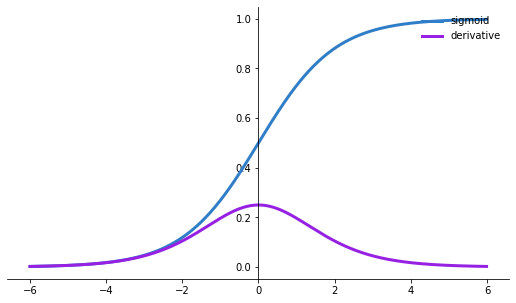

In [7]:
# Defining the sigmoid function
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    ds = s * (1-s)  
    return s, ds

# Points needed to plot
x = np.arange(-6, 6, 0.01)

# Getting the sigmoid function for each of the points
s, ds = sigmoid(x)


# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create and show plot
ax.plot(x, s, color="#307EC7", linewidth=3, label="sigmoid")
ax.plot(x, ds, color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

**Tanh Activation Function**

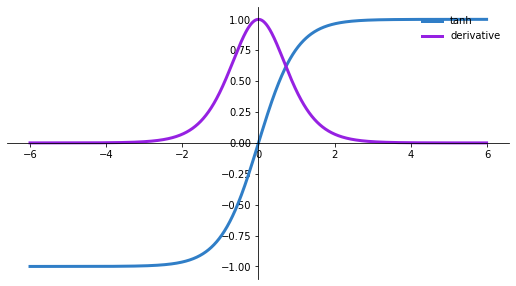

In [8]:
# Defining the tanh function
def tanh(x):
    t = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    dt = 1 - t**2
    return t, dt

z = np.arange(-6, 6, 0.01)


# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create and show plot
ax.plot(z,tanh(z)[0], color="#307EC7", linewidth=3, label="tanh")
ax.plot(z,tanh(z)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

Let us now train a Multi-layer perceptron from scratch. We will go through all the steps one by one and will show results on the MNIST dataset for the model trained from scratch. However, we will soon check out some other complex datasets after that.

### A Multi-layer Perceptron from Scratch


Before we jump into using the `keras` library to train neural networks, we try out the steps using only `numpy`. We will be going through each of the involved steps. While in practice, several of these steps are automated by standard libraries like `keras`, it is very important to know the internal workings of a neural network. 

While the dataset is already loaded, we need to modify the labels. Instead of feeding class numbers we need to create one-hot encodings. The input images of the dataset can remain as it is and will be directly fed to the network.  

**What are one-hot encodings?**

A one hot vector is of the dimension of "number of classes". If there are $10$ classes in the dataset, we will have one-hot vectors that are $10$ dimensional. With one-hot, we convert each categorical class value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. Each class is assigned a particular index which is kept $1$ for that particular class and rest all indices are filled with $0$ for that class. For example, say there are three classes "cat", "dog" and "horse". Say "cat" is given the $0th$ index. Therefore, all the cat images are labelled as $[1, 0, 0]$. Similarly say, horse is given index 1. Then all the horse images are labelled as $[0, 1, 0]$. Again, dog images can be labelled as $[0, 0, 1]$. So we convert the integer class values present in the MNIST dataset into one-hot encodings. 


In [9]:
# Defining the function to change class numbers to one-hot vectors
# Number of classes is defined
# A batch of data is sent instead of one at a time to this function
# all_y is of the shape (N,). Here N is the number of samples which is 10,000 for test and 60,000 for train
def class2onehot(all_y, num_classes=10):
  all_one_hot = []
  for one_y in all_y:
    one_hot = np.zeros(num_classes)
    one_hot[one_y] = 1
    all_one_hot.append(one_hot)
  return np.array(all_one_hot)

Lets change the label representation for both train and test data.

In [10]:
# Making class labels into one hot vectors
train_y_onehot = class2onehot(train_y)
test_y_onehot = class2onehot(test_y)

Let us define our network now. Our network will have the following structure.
```
Input Layer: 784 Neurons [MNIST input shape]
Hidden Layer: 200 Neurons
Output Layer: 10 Neurons [Number of classes]
```

We will have to define a forward function and a backpropagation function. We will also define the sigmoid activation function and a simple MSE loss. We don't use a cross entropy loss for simplicity in calculating the gradients. The overall code snippets are taken and modified from https://www.geeksforgeeks.org/implementation-of-neural-network-from-scratch-using-numpy/ 



In [11]:
# Sigmoid activation function

def sigmoid(x):
	return (1 / (1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer 784
# 1 hidden layer 200
# 1 output layer 10

# Defining the forward propagation block
# z1 <- x*w1
# a1 <- sigmoid(z1)
# z2 <- a1*w2
# a2 <- sigmoid(z2)
def f_forward(x, w1, w2):

	# Hidden
	z1 = x.dot(w1)# using w1
	a1 = sigmoid(z1)# using sigmoid
	
	# Output layer
	z2 = a1.dot(w2)# using w2
	a2 = sigmoid(z2)# final output
	return(a2)

# Initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# We use the MSE loss. 
# Ideally we should use cross entropy loss but we use MSE for simplicity
def loss(out, y):
	s =(np.square(out - y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
	# We again do a forward propagation in this step.
  # This can ideally be avoided but we keep it for simplicity
	# output from hidden layer
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# output of layer 1
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer

	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1 - (alpha*(w1_adj))
	w2 = w2 - (alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
  # declaring loss and accuracy
  acc =[]
  losss =[]

  # Training loop
  for j in range(epoch):
    l =[]
    for i in range(len(x)):
      # Feed forward step
      out = f_forward(x[i], w1, w2)

      # Calculating the loss
      l.append((loss(out, Y[i])))

      # Updating the step
      w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
		
    print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
    acc.append((1-(sum(l)/len(x)))*100)
    losss.append(sum(l)/len(x))
  return(acc, losss, w1, w2)

# Predicting results for any given input
def predict(x, w1, w2):
  # Forward loop for testing
  # No backpropagation while testing!
  Out = f_forward(x, w1, w2)

  # Selecting the class with the maximum score!
  maxm = 0
  k = 0
  Out = Out[0][0]
  for i in range(len(Out)):
    if(maxm < Out[i]):
      maxm = Out[i]
      k = i
      
  return k





We now define the weights. We use the `generate_wt` function described above.

In [12]:
w1 = generate_wt(784, 200)
w2 = generate_wt(200, 10)

Let us put this model to train! We only train the model for two epochs. Please train it for more and see how it affects the test accuracy!

In [13]:
train_X_reshaped2 = np.reshape(train_X_reshaped, (train_X_reshaped.shape[0], 1, train_X_reshaped.shape[1]))
acc, losss, w1, w2 = train(train_X_reshaped2, train_y_onehot, w1, w2, 0.1, 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


epochs: 1 ======== acc: 86.21873447415918
epochs: 2 ======== acc: 84.45520510327891


Now that we have trained our model on the MNIST dataset. Let us also test it and check the accuracy and also plot the predicted labels.

Ground-truth label of the below image:  1


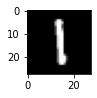

Predicted label of the above image:  8
------------------------------------------------
Ground-truth label of the below image:  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


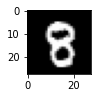

Predicted label of the above image:  8
------------------------------------------------


In [14]:
# Plotting two images randomly and also printing their labels
for i in range(2):
  j = np.random.randint(0, 10000)  
  plt.subplot(330 + 1 + i)
  plt.imshow(test_X[j], cmap=plt.get_cmap('gray'))
  print ("Ground-truth label of the below image: ", test_y[j])
  plt.show()

  test_image = np.reshape(test_X[j], [1, 1, 784])
  # Predicting function from the perceptron model.
  label_predict = predict(test_image, w1, w2)

  # label_predict has the label.
  print ("Predicted label of the above image: ", label_predict)
  print ("------------------------------------------------")


We also test the overall accuracy achieved by the trained network on the $10000$ test images. The training accuracy was also displayed previously during training. Please train the model more to get a better accuracy!

In [15]:
acc = 0
# Plotting two images randomly and also printing their labels
for i in range(len(test_X)):
  test_image = np.reshape(test_X[i], [1, 1, 784])
  label_gt = test_y[i]

  # Predicting function defined in an above cell.
  label_predict = predict(test_image, w1, w2)

  if label_predict == label_gt:
    acc += 1
print ("Accuracy using MLP from scratch: ", acc/len(test_X))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Accuracy using MLP from scratch:  0.2078


Let us now see how we automate a lot of this process and use the standard `keras` library. 

### A Multi-layer Perceptron using `Keras`


We will be building a similar model to what we created from scratch using `keras`. Our model will have one extra hidden layer and contain the same activation functions. However, we will be using a softmax cross entropy loss instead of a MSE loss. This will lead to better accuracy than the model from scratch. We will also use the MNIST dataset to train the MLP model first.

**Model Defination in Keras**

For defining the model in keras, we will use the Sequential method. There is another method called the Functional method which is used more building more complex models. In Sequential method, we can first define `model=Sequential()` and then we can simply use `model.add()` to add layers one by one. We will also be adding the activation functions. The function `Dense()` already has a parameter called `activation` which can take in values like `sigmoid`, `relu`, etc. In this model we have the following model structure, 

```
Input Layer: 784 Neurons [MNIST input shape]
Hidden Layer: 200 Neurons
Hidden Layer: 100 Neurons
Output Layer: 10 Neurons [Number of classes]
```

In [16]:
# Defining a model using the Sequential method.
# In this we can add all the layers one by one
model = Sequential()

# First hidden layer. Input dim has to be specified. So we write 784
model.add(Dense(200, input_dim=784, activation='sigmoid'))

# Second hidden layer
model.add(Dense(100, activation='sigmoid'))

# The output layer
model.add(Dense(10, activation='sigmoid'))

We will have to compile the model with information like loss that we will be using and also the optimizer type we need to use. We can also mention a metric (like accuracy) that we need to print while training.

**Compiling the Keras Model**

In [17]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

We now fit the model on the training data. We use the (N, 784) shaped data as input. `Keras` takes the labels as one-hot encodings. The training loop automatically runs inside the `fit()` function. Before running the model, we will also check if we are running our network on a GPU or not.

In [18]:
# Checking if we are running on a GPU
!nvidia-smi

# Ensure the keras function runs. 
tf.config.run_functions_eagerly(True)

Sat Jan 29 03:29:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W /  70W |    266MiB / 15109MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In case, we are not running on a GPU, please click on the `RAM Disk` icon on top left, go to Change runtime type (bottom right) and select GPU!

In [19]:
# Training loop.
# epochs is the number of epochs the model needs to run
# batch_size of a single run
model.fit(train_X_reshaped, train_y_onehot, epochs=2, batch_size=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/2
600/600 [==============================] - 10s 14ms/step - loss: 0.5629 - accuracy: 0.8615
Epoch 2/2
600/600 [==============================] - 8s 14ms/step - loss: 0.2912 - accuracy: 0.9144


We now evaluate the MLP model using the MNIST test data.

In [20]:
_, accuracy = model.evaluate(test_X_reshaped, test_y_onehot)
print('Accuracy: %.2f' % (accuracy))

 13/313 [>.............................] - ETA: 2s - loss: 0.2008 - accuracy: 0.9375

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 3s 9ms/step - loss: 0.2440 - accuracy: 0.9273
Accuracy: 0.93


We also predict a plot random samples from the MNIST dataset. 

Ground-truth label of the below image:  1


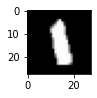

Predicted label of the above image:  1
------------------------------------------------
Ground-truth label of the below image:  7


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


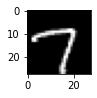

Predicted label of the above image:  7
------------------------------------------------


In [21]:
# Plotting two images randomly and also printing their labels
for i in range(2):
  j = np.random.randint(0, 10000)  
  plt.subplot(330 + 1 + i)
  plt.imshow(test_X[j], cmap=plt.get_cmap('gray'))
  print ("Ground-truth label of the below image: ", test_y[j])
  plt.show()
  test_image = np.reshape(test_X[j], [1, 784])
  # Predicting function from the keras model.
  label_predict = model.predict(test_image)

  # label_predict has the label.
  print ("Predicted label of the above image: ", np.argmax(label_predict))
  print ("------------------------------------------------")

Finally, we try to check the performance of the above model on a real world dataset. The dataset is a collected of lung images from covid patients along with normal lung images. The task is to find out whether a given lung image is of a covid infected lung or not. The dataset has to be downloaded from a Google drive link provided below and then unzipped.

### COVID-19 Dataset



In [22]:
# Downloading the dataset from Google drive.
# Using gdown for downloading from google drive
# You can use the command gdown https://drive.google.com/uc?id=PUT_ID_HERE
!gdown https://drive.google.com/uc?id=1Dxs9rjgxWYGpSVMlkwSI7_ygDjhACkgp

Downloading...
From: https://drive.google.com/uc?id=1Dxs9rjgxWYGpSVMlkwSI7_ygDjhACkgp
To: /content/covid_dataset.zip
100% 781M/781M [00:10<00:00, 75.8MB/s]


Unzipping the dataset

In [23]:
!unzip covid_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6721.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6722.png  
  inflating:

Let us first check the folder structure of the dataset and determine the things we are going to use.

In [24]:
!ls COVID-19_Radiography_Dataset/

 COVID			      Normal.metadata.xlsx
 COVID.metadata.xlsx	      README.md.txt
 Lung_Opacity		     'Viral Pneumonia'
 Lung_Opacity.metadata.xlsx  'Viral Pneumonia.metadata.xlsx'
 Normal


As we can see, the folder `COVID-19_Radiography_Dataset/COVID` contains images of covid affected lungs while `COVID-19_Radiography_Dataset/Normal` contains images from normal lungs. Our main goal is to classify between these two types. So let us create the dataset! 

In [25]:
# Storing filenames of all the images from both the folders
all_covid_images = glob("COVID-19_Radiography_Dataset/COVID/*.png")
all_normal_images = glob("COVID-19_Radiography_Dataset/Normal/*.png")

print ("Number of COVID images: ", len(all_covid_images))
print ("Number of normal images: ", len(all_normal_images))

# To remove class imbalance we select less number of normal images
# There are other ways to remove class imbalance too. We do a random selection here
all_normal_images = random.choices(all_normal_images, k=len(all_covid_images))

print ("Number of normal images that were selected randomly: ", len(all_normal_images))

# Defining the labels of the classes
COVID_LABEL = 0
NORMAL_LABEL = 1

Number of COVID images:  3616
Number of normal images:  10192
Number of normal images that were selected randomly:  3616


Lets randomly plot some samples from the dataset

Sample COVID image


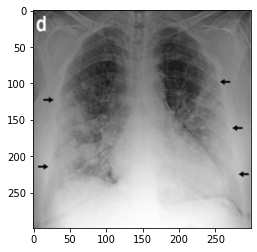

Sample Normal image


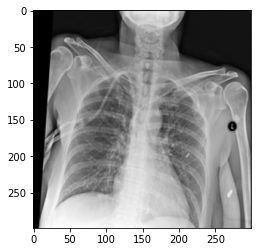

In [26]:
# Randomly plotting one sample each from both the classes!
random_covid_image_filename = random.choice(all_covid_images)
random_covid_image = cv2.imread(random_covid_image_filename, 0)
plt.imshow(random_covid_image, cmap=plt.get_cmap('gray'))
print ("Sample COVID image")
plt.show()

random_normal_image_filename = random.choice(all_normal_images)
random_normal_image = cv2.imread(random_normal_image_filename, 0)
plt.imshow(random_normal_image, cmap=plt.get_cmap('gray'))
print ("Sample Normal image")
plt.show()


We will read the images and store them in numpy arrays. We will also resize the images to 28x28 like MNIST. This is not ideal and done for demo purposes only! You can change the size of the images in the code. Also don't forget to change the size of the input layer in that case!

In [27]:
# List to get all the images and the corresponding labels.
all_images_labels = []

# Fixing image size
IMAGE_SIZE = 28

# Reading all the covid images
for one_image_name in all_covid_images:
  # one_image_name contains the filename of the image
  # The parameter 0 ensures its loaded in grayscale!
  one_image = cv2.imread(one_image_name, 0)
  one_image = cv2.resize(one_image, (IMAGE_SIZE, IMAGE_SIZE))

  all_images_labels.append([one_image, COVID_LABEL]) 


# Reading all the normal images
for one_image_name in all_normal_images:
  # one_image_name contains the filename of the image
  # The parameter 0 ensures its loaded in grayscale!
  one_image = cv2.imread(one_image_name, 0)
  one_image = cv2.resize(one_image, (IMAGE_SIZE, IMAGE_SIZE))

  all_images_labels.append([one_image, NORMAL_LABEL]) 

# We shuffle the list to make sure the dataset does not introduce undue bias
random.shuffle(all_images_labels)

# We now separate out the X and y, where X are the image inputs and y are the GT labels!
X = []
y = []
for one_image_label in all_images_labels:
  X.append(one_image_label[0])
  y.append(one_image_label[1])


X = np.array(X)
y = np.array(y)

print ("The shape of the input: ", X.shape)
print ("The shape of the ground-truth: ", y.shape)

The shape of the input:  (7232, 28, 28)
The shape of the ground-truth:  (7232,)


Therefore, we have reshaped our input and ground-truth similar to MNIST. We now, divide the dataset into train and test sets. We will be using 90% of the dataset for training and 10% for testing!

In [35]:
# Dividing the dataset into train and test sets!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Reshaping the data into 1D so that we can feed to a MLP
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]* X_train.shape[2]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]* X_test.shape[2]))

Let us now train the model and check the results! We use a slightly deeper model in this case and use `keras` for training.

In [42]:
# Defining a model using the Sequential method.
# In this we can add all the layers one by one
model = Sequential()

# First hidden layer. Input dim has to be specified. So we write 784
model.add(Dense(500, input_dim=IMAGE_SIZE*IMAGE_SIZE, activation='relu'))

# Second hidden layer
model.add(Dense(200, activation='relu'))

# Third hidden layer
model.add(Dense(100, activation='relu'))

# The output layer. We will use binary cross entropy
model.add(Dense(1, activation='sigmoid'))

Compiling the above model with binary-crossentropy loss. Remember we have only 2 classes in this case. So a single value can determine the class. Anything below 0.5 belongs to class 0 and vice-versa.

In [43]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Let us fit the data to our model and measure the accuracy!

In [44]:
# Training loop.
# epochs is the number of epochs the model needs to run
# batch_size of a single run

model.fit(X_train_reshaped, y_train, epochs=100, batch_size=100)

Epoch 1/100
 8/66 [==>...........................] - ETA: 0s - loss: 104.4367 - accuracy: 0.5025

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


66/66 [==============================] - 1s 15ms/step - loss: 20.3320 - accuracy: 0.5770
Epoch 2/100
66/66 [==============================] - 1s 15ms/step - loss: 2.3922 - accuracy: 0.6566
Epoch 3/100
66/66 [==============================] - 1s 15ms/step - loss: 1.1439 - accuracy: 0.6893
Epoch 4/100
66/66 [==============================] - 1s 15ms/step - loss: 1.0398 - accuracy: 0.7096
Epoch 5/100
66/66 [==============================] - 1s 15ms/step - loss: 0.7062 - accuracy: 0.7488
Epoch 6/100
66/66 [==============================] - 1s 15ms/step - loss: 0.6224 - accuracy: 0.7664
Epoch 7/100
66/66 [==============================] - 1s 15ms/step - loss: 0.4959 - accuracy: 0.7846
Epoch 8/100
66/66 [==============================] - 1s 15ms/step - loss: 0.4883 - accuracy: 0.7893
Epoch 9/100
66/66 [==============================] - 1s 15ms/step - loss: 0.5047 - accuracy: 0.7847
Epoch 10/100
66/66 [==============================] - 1s 15ms/step - loss: 0.4843 - accuracy: 0.8062
Epoch 11/1

We trained our model for 100 epochs and got 88.95% training accuracy! Let us now test our model on the test set and get the test accuracy.

In [46]:
_, accuracy = model.evaluate(X_test_reshaped, y_test)
print('Test Accuracy: %.2f' % (accuracy))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


23/23 [==============================] - 1s 23ms/step - loss: 0.3692 - accuracy: 0.8481
Accuracy: 0.85


The testing accuracy is 85%! It is pretty good on a MLP. We will later see how it changes in CNN and other types of networks.

### Excercise
1. Change the activations of the hidden layers in the model trained on the COVID-19 dataset and report accuracy! Do you see any changes? 

2. Increase and decrease the image size of the COVID-19 dataset and comment on speed and accuracy. Can you understand the tradeoff?

3. What will happen if we did not give the activation functions?

### Graded Excercise

1. What is ReLU(-0.1)
   
   (a) 0.1
   
   (b) -0.1

   (c) 0

   Answer: (c). 
   
   Reason: ReLU(x) = max(0,x) 